# Encoder Decoder model

In [85]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model

from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
def define_models(n_input, n_output, n_units):
    # define training encoder
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(n_units, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    # define training decoder
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(n_units, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    # define inference encoder
    encoder_model = Model(encoder_inputs, encoder_states)
    # define inference decoder
    decoder_state_input_h = Input(shape=(n_units,))
    decoder_state_input_c = Input(shape=(n_units,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
    # return all models
    return model, encoder_model, decoder_model

In [6]:
# generate target given source sequence
def predict_sequence(infenc, infdec, source, n_steps, cardinality):
    # encode
    state = infenc.predict(source)
    # start of sequence input
    target_seq = array([0.0 for _ in range(cardinality)]).reshape(1, 1, cardinality)
    # collect predictions
    output = list()
    for t in range(n_steps):
        # predict next char
        yhat, h, c = infdec.predict([target_seq] + state)
        # store prediction
        output.append(yhat[0,0,:])
        # update state
        state = [h, c]
        # update target sequence
        target_seq = yhat
    return array(output)

In [7]:
n_features = 50 + 1

In [8]:
# generate a sequence of random integers
def generate_sequence(length, n_unique):
    return [randint(1, n_unique-1) for _ in range(length)]

In [9]:
# define target sequence
target = source[:n_out]
target.reverse()

NameError: name 'source' is not defined

In [13]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG


# configure
num_encoder_tokens = 71
num_decoder_tokens = 93
latent_dim = 256
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

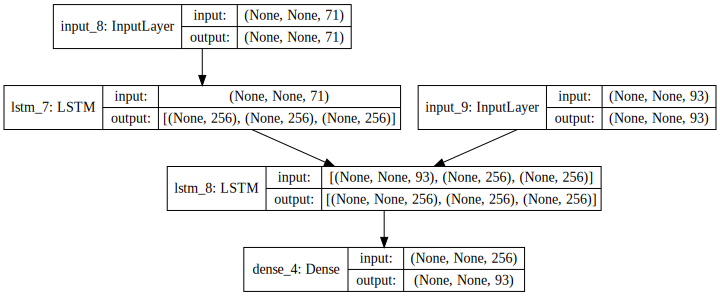

In [14]:
dot = model_to_dot(model, show_layer_names=True, show_shapes=True)
SVG(dot.create(prog='dot', format='svg'))

# Rough example

In [15]:
english = ['where are you going', 'how do you do', 'where is the bus stop', 'please give me change', 'i need some directions', 'thank you very much', 'is there a room available', 'how much should i pay you']
hinglish = ['kahan ja rahe ho', 'aap kaise hain', 'bus stop kahan hai', 'khulle paise dein', 'mujhe rasta bata do', 'bhaut dhanyawad aapka', 'koi kamra hai kya', 'aapko kitne paise doon']

In [142]:
translations = [i for i in zip(english, hinglish)]
translations

[('where are you going', 'kahan ja rahe ho'),
 ('how do you do', 'aap kaise hain'),
 ('where is the bus stop', 'bus stop kahan hai'),
 ('please give me change', 'khulle paise dein'),
 ('i need some directions', 'mujhe rasta bata do'),
 ('thank you very much', 'bhaut dhanyawad aapka'),
 ('is there a room available', 'koi kamra hai kya'),
 ('how much should i pay you', 'aapko kitne paise doon')]

In [149]:
def get_vocab(sequences):
    tokens = [seq.split() for seq in sequences]
    tokens = [i for sublist in tokens for i in sublist]
    tokens = list(set(tokens))
    return ['!'] + tokens

In [150]:
input_vocab = get_vocab(english)
output_vocab = get_vocab(hinglish)

In [151]:
def label_encoder(sequence, vocab):
    vocab_indexes = [i for i in enumerate(vocab)]
    labels = [[j[0] for j in vocab_indexes if j[1]==i][0] for i in sequence.split()]
    return labels

def get_sequence(labeled_sequence, vocab):
    vocab_indexes = [i for i in enumerate(vocab)]
    words = [[j[1] for j in vocab_indexes if j[0]==i][0] for i in labeled_sequence]
    return ' '.join([i for i in words if i!='!'])

In [157]:
get_sequence(hinglish_labels[2], output_vocab)

'bus stop kahan hai'

In [153]:
english_labels = [label_encoder(i, input_vocab) for i in english]
hinglish_labels = [label_encoder(i, output_vocab) for i in hinglish]

english_labels = pad_sequences(english_labels, 6)
hinglish_labels = pad_sequences(hinglish_labels, 4)

In [114]:
from keras.layers import Input, Dense, Embedding, LSTM
from keras.models import Model
from keras.preprocessing.sequence import pad_sequences

In [119]:
enc_inp = Input((6,))
enc_emb = Embedding(len(input_vocab), 5, input_length=6)(enc_inp)
enc_out, h, c = LSTM(4, return_state=True, return_sequences=True)(enc_emb)
enc_states = [h, c]

In [120]:
model = Model(enc_inp, enc_out)

In [129]:
english_labels[0]

array([ 0,  0, 11, 26, 16,  2], dtype=int32)

In [121]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 6, 5)              135       
_________________________________________________________________
lstm_21 (LSTM)               [(None, 6, 4), (None, 4), 160       
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


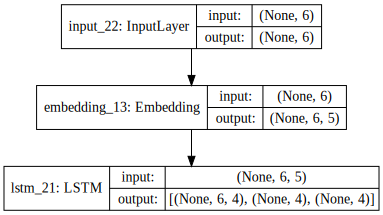

In [122]:
dot = model_to_dot(model, show_shapes=True, )
SVG(dot.create(prog='dot', format='svg'))

In [105]:
model.predict(english_labels[0:1])

array([[-0.00417407,  0.00129268,  0.01470994, -0.02471226]],
      dtype=float32)

In [ ]:
dec_inp = 

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 6, 5)              135       
_________________________________________________________________
lstm_21 (LSTM)               [(None, 6, 4), (None, 4), 160       
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [73]:
enc_out

[<tf.Tensor 'lstm_14/TensorArrayReadV3:0' shape=(?, 10) dtype=float32>,
 <tf.Tensor 'lstm_14/while/Exit_3:0' shape=(?, 10) dtype=float32>,
 <tf.Tensor 'lstm_14/while/Exit_4:0' shape=(?, 10) dtype=float32>]

In [125]:
ee = Embedding(num_encoder_tokens, latent_dim)

In [ ]:
ee()

In [ ]:
ll()

In [124]:
ll = LSTM(latent_dim, return_sequences=True)

In [106]:
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None,))
x = Embedding(num_encoder_tokens, latent_dim)(encoder_inputs)
x, state_h, state_c = LSTM(latent_dim,
                           return_state=True)(x)
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
x = Embedding(num_decoder_tokens, latent_dim)(decoder_inputs)
x = LSTM(latent_dim, return_sequences=True)(x, initial_state=encoder_states)
decoder_outputs = Dense(num_decoder_tokens, activation='softmax')(x)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile & run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
# Note that `decoder_target_data` needs to be one-hot encoded,
# rather than sequences of integers like `decoder_input_data`!

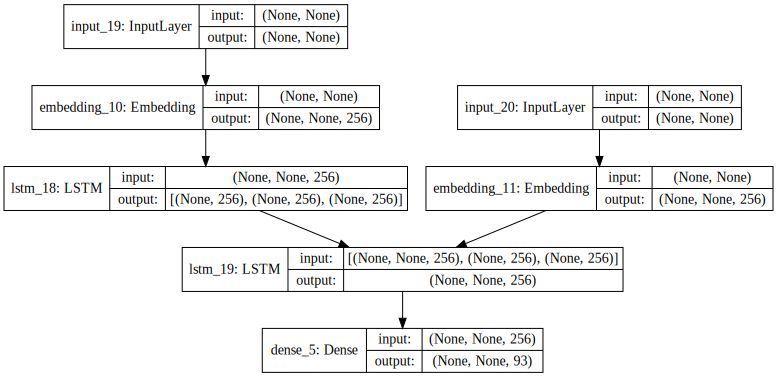

In [113]:
dot = model_to_dot(model, show_shapes=True, )
SVG(dot.create(prog='dot', format='svg'))